In [91]:
def clamp(n, minimum, maximum):
    return max(min(maximum, n), minimum)

In [92]:
def func(m, x, b):
    return m*x + b

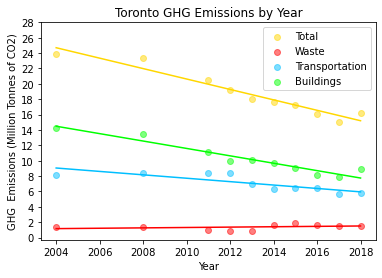

In [93]:
#This cell graphs CO2 emissions, population and year
import csv, pandas as pd, numpy as np, matplotlib.pyplot as plt
from collections import defaultdict

data = []
total = []
waste = []
transport = []
building = []
color = ["Gold", "Red", "DeepSkyBlue", "Lime"]
year = []

with open('data/1990-2018 GHG Emissions.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    #Stores data in arrays
    for line in csv_reader:
        data.append(line)
        total.append(float(line['Total']))
        waste.append(float(line['Waste']))
        transport.append(float(line['Transportation']))
        building.append(float(line['Buildings']))
        year.append(int(line["Year"]))
                
data = ([total], [waste], [transport], [building], [year])

#Creates Legend and Plots graph
plt.scatter(year, total, c="Gold", alpha=0.5, label="Total")
plt.scatter(year, waste, c="Red", alpha=0.5, label="Waste")
plt.scatter(year, transport, c="DeepSkyBlue", alpha=0.5, label="Transportation")
plt.scatter(year, building, c="Lime", alpha=0.5, label="Buildings")

#Line of best fit
for i in range(len(data) - 1):
    x = np.array(data[4]).flatten() 
    y = np.array(data[i]).flatten()
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, func(m,x,b), color=color[i])

#Draws Graph
plt.title('Toronto GHG Emissions by Year')
plt.xlabel('Year')
plt.ylabel('GHG  Emissions (Million Tonnes of CO2)')
plt.legend()
plt.xticks(np.arange(2004, 2019, 2))
plt.yticks(np.arange(0, 30, 2))
plt.show()

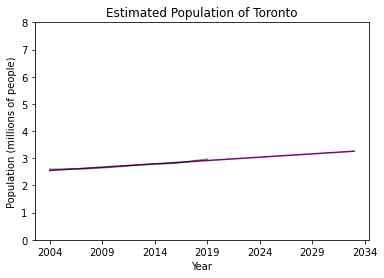

In [94]:
#This cell graphs population vs time
#Source: www.macrotrends.net, from UN world population aspects
import csv, pandas as pd, numpy as np, matplotlib.pyplot as plt
from collections import defaultdict

pop = []
year2 = []
trend = []
l = []

with open('data/Population.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    #Stores data in arrays
    for line in csv_reader:
        date = int(line['label'])
        if date >= 2004:
            year2.insert(0, date)
            pop.insert(0, float(line['Total Population'])/1000000)
            
#Line of best fit
x = np.array(year2)
y = np.array(pop)
m, b = np.polyfit(x, y, 1)
for i in range(30):
    trend.append(func(m,(2004 + i),b))
    l.append(2004 + i)
plt.plot(l, trend, "Purple")
    
#Draws graph
plt.plot(year2, pop, c="Black", alpha=0.5)
plt.title('Estimated Population of Toronto')
plt.xlabel('Year')
plt.ylabel('Population (millions of people)')
plt.xticks(np.arange(2004, 2037, 5))
plt.yticks(np.arange(0, 9, 1))
plt.show()

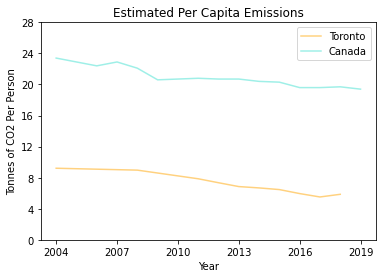

In [95]:
emissions = []
per_capita = []
year3 = []
can_pc = []

with open('data/Canada Per Capita Emissions.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    for line in csv_reader:
        can_pc.append(float(line['Emissions']))
        year3.append(float(line['Year']))
        
#Calculating estimated per capita emissions using UN data and trend line
x = np.array(data[4]).flatten() 
y = np.array(data[0]).flatten()
m, b = np.polyfit(x, y, 1)

#This is for extrapolating
for i in range(len(year)):
    y = func(m , (i + 2004), b)
    #per_capita.append(float(y)/pop[i])
    per_capita.append(float(total[i]/pop[i]))
    
#Creates Legend and Plots graph
plt.plot(year, per_capita, c="Orange", alpha=0.5, label="Toronto")
plt.plot(year3, can_pc, c="Turquoise", alpha=0.5, label="Canada")

#Draws graph
plt.title('Estimated Per Capita Emissions')
plt.xlabel('Year')
plt.ylabel('Tonnes of CO2 Per Person')
plt.yticks(np.arange(0, 30, 4))
plt.xticks(np.arange(2004, 2021, 3))
plt.legend()
plt.show()

In [96]:
#This cell organizes the data for renewable installations
import csv, re, math
from collections import defaultdict

renewable = {}
with open('data/Renewable Energy Installations.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)

    for line in csv_reader:
        name = line['LINEAR_NAME_FULL']
        geo = line['geometry']
        
        renewable.setdefault(name, {
            'Latitude': 0,
            'Longitude': 0
        })
        
        #Gathers coordinates of renewables
        x = re.search(r"\(([A-Za-z0-9.\-,\s]+)\)", geo)
        coordinates = x.group(1).split(", ")
        
        renewable[name]['Latitude'] = coordinates[1]
        renewable[name]['Longitude'] = coordinates[0]

for i, value in renewable.items():
    #print(i)
    a = renewable[i]['Latitude']
    b = renewable[i]['Longitude']
    #print(f'\t{a}, {b}')

In [97]:
#This cell organizes the data for CO2 emissions
import csv, pgeocode, pandas as pd
from collections import defaultdict

building = {}

with open('data/Annual Energy.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    for line in csv_reader:
        #print(line)
        name = line['\ufeffOperation Name']
        if not name == "":
            if (not line['Total (calculated in webform)'].replace(",","") == ""):
                emissions = float(line['Total (calculated in webform)'].replace(",",""))
            else:
                emissions = 0
            postal = line['Postal Code']
            nomi = pgeocode.Nominatim('ca')
            
            energy = float(line['Energy Type and Amount Purchased and Consumed in Natural Units'].replace(",", ""))
            area = float(line['Total Floor Area'])
        
            building.setdefault(name, {
                'Emissions': 0,
                'Latitude': 0,
                'Longitude': 0,
                'Energy': 0,
                'Floor Area': 0,
                'Efficiency': 0
            })
        
            nomi = nomi.query_postal_code(postal)
            #Sets Coordinates
            building[name]['Longitude'] = (nomi.longitude)
            building[name]['Latitude'] = (nomi.latitude)
            building[name]['Emissions'] = emissions
            building[name]['Energy'] = energy
            building[name]['Floor Area'] = area
            building[name]['Efficiency'] = emissions/(energy + 1)

for place, value in building.items():
    a = building[place]['Longitude']
    b = building[place]['Latitude']
    c = building[place]['Emissions']
    d = building[place]['Energy']

    #e = float(c)/float(d)
    #print(place)
    #print(f'\t Coordinates:{a}, {b} - Emissions:{c} - Energy:{d} = {e}')

#Makes a table displaying information
df = pd.DataFrame(building).T

df

,Emissions,Latitude,Longitude,Energy,Efficiency
Stephenson Building,0.0,43.6641,-79.3889,2.181065e+06,0.000000
2 Civic Centre Court,115197.0,43.6437,-79.5767,1.259537e+06,0.091460
51 Lisgar,12565.0,43.6480,-79.4177,7.094746e+04,0.177100
Archives and Records Centre,108376.0,43.6736,-79.4035,4.801582e+05,0.225708
Atlantic Ave Storage Bldg,55473.0,43.6383,-79.4301,1.056177e+05,0.525219
...,...,...,...,...,...
West Toronto Pumping Station,178196.0,43.6748,-79.4839,4.454903e+06,0.040000
F.J. Horgan Filtration Plant,2062673.0,43.7678,-79.1866,3.965985e+07,0.052009
Island Filtration Plant,367898.0,43.6230,-79.3936,7.770374e+06,0.047346
R.C. Harris Filtration Plant,1918036.0,43.6784,-79.2941,4.589065e+07,0.041796


In [98]:
#This cell organizes data for green roofs
import csv, pgeocode
from collections import defaultdict

roof = {}

with open ('data/Green Roofs.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    for line in csv_reader:
        complete = line["COMPLETED_DATE"]
        postal = line["POSTAL"]
        if not complete == "" and not postal == "   ":
            street = line["STREET_NAME"]
            area = float(line['GREEN_ROOF_AREA'].replace(",", ""))
            
            roof.setdefault(street, {
                'Area': 0,
                'Latitude': 0,
                'Longitude': 0
            })
            
            nomi = pgeocode.Nominatim('ca')
            nomi = nomi.query_postal_code(postal)
            roof[street]['Longitude'] = (nomi.longitude)
            roof[street]['Latitude'] = (nomi.latitude)
            roof[street]['Area'] = area

roof = dict(sorted(roof.items(), key = lambda kv: kv[1]['Area'], reverse=True))
max_area = roof[next(iter(roof))]['Area'] 


In [99]:
#This cell maps greenhouse locations vs energy use
from ipyleaflet import Map, Marker, basemaps, Popup, Circle
from ipywidgets import HTML

m = Map(center = (43.6487, -79.38544), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
#Sorts dictionary by highest to lowest emissions so on the map the big circle appears below
building = dict(sorted(building.items(), key = lambda kv: kv[1]['Efficiency'], reverse=False))

# Adds circle markers for green roofs
for street, value in roof.items():
    area = roof[street]['Area']
    if area > 0:
        circle = Circle()
        circle.location = (roof[street]['Latitude'], roof[street]['Longitude'])
        circle.radius = int(clamp(1000 * area/2000, 100, 1000))
        #Calculates the color based on greenhouse gas emissions, higher means more red

        col = "Green"
        circle.color = col
        circle.fill_color = col
    
        #Creates a popup for each circle
        popup2 = Popup(
            location=(roof[street]['Latitude'], roof[street]['Longitude']),
            close_button=False,
            auto_close=False,
            close_on_escape_key=False
        )
    
        #Creates message, which shows division and percentage
        message = HTML()
        message.value = (f'\t{street}, {area} m^2')
    
        m.add_layer(circle)
        circle.popup = message
#Adds circle markers for energy consumption
for place, value in building.items():
    circle = Circle()
    circle.location = (building[place]['Latitude'], building[place]['Longitude'])
    nrg = building[place]['Energy']
    ghg = building[place]['Emissions']
    max_nrg = 10000000
    circle.radius = int(clamp(math.pow(nrg, 1.0/3), 50, 1750))
    
    #Calculates the color based on ghg/energy, higher means more red
    green = str(hex(int(clamp(1 - nrg/(max_nrg), 0, 0.5) * 255 * 2)))
    if int(green, 16) < 16:
        green = "0" + green
    green = green.replace("0x", "")
    
    red = str(hex(int(clamp(nrg/(max_nrg), 0, 0.5) * 255 * 2)))
    if int(red,16) < 16:
        red = "0" + red
    red = red.replace("0x", "")
    
    col = "#" + red + green + "00"
    circle.color = col
    circle.fill_color = col
    
    #Creates a popup for each circle
    popup2 = Popup(
        location=(building[place]['Latitude'], building[place]['Longitude']),
        close_button=False,
        auto_close=False,
        close_on_escape_key=False
    )
    
    #Creates message, which shows division and percentage
    message2 = HTML()
    x = ghg/(nrg + 1)
    message2.value = (f'\t{place}, {nrg} kWh, {x}')
    
    m.add_layer(circle)
    circle.popup = message2
m

Map(center=[43.6487, -79.38544], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [100]:
#This cell maps renewables vs GHG emissions
from ipyleaflet import Map, Marker, basemaps, Popup, Circle
from ipywidgets import HTML

highEmission = 3000000
#Sorts dictionary by highest to lowest emissions so on the map the big circle appears below
building = dict(sorted(building.items(), key = lambda kv: kv[1]['Emissions'], reverse=True))

#Creates map
m = Map(center = (43.6487, -79.38544), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
#m = Map(center = (43.6656, -79.383), zoom = 10, min_zoom = 1, max_zoom = 20)

#Adds markers
#https://ipyleaflet.readthedocs.io/en/latest/api_reference/popup.html
for i, value in renewable.items():
    #Stores coordinates in integers
    a = renewable[i]['Latitude']
    b = renewable[i]['Longitude']
    
    #Adds all the markers
    center = (a, b)
    marker = Marker(location=center, draggable=False)
    m.add_layer(marker);
    
    #Creates message
    message = HTML()
    message.value = i
    
    #Creates popup
    popup = Popup(
        location=center,
        close_button=False,
        auto_close=False,
        close_on_escape_key=False
    )
    #Adds popup to layer and associates it with the message and marker
    marker.popup = message
    
# Adds circle markers
for place, value in building.items():
    circle = Circle()
    circle.location = (building[place]['Latitude'], building[place]['Longitude'])
    ghg = building[place]['Emissions']
    circle.radius = int(clamp(math.sqrt(ghg), 50, 1750))
    #Calculates the color based on greenhouse gas emissions, higher means more red
    green = str(hex(int(clamp(highEmission - ghg, 0, highEmission/2) * 2 * 255/highEmission)))
    if int(green, 16) < 16:
        green = "0" + green
    green = green.replace("0x", "")
    
    red = str(hex(int(clamp(ghg, 0, highEmission/2) * 2 * 255/highEmission)))
    if int(red,16) < 16:
        red = "0" + red
    red = red.replace("0x", "")
    
    col = "#" + red + green + "00"
    circle.color = col
    circle.fill_color = col
    
    #Creates a popup for each circle
    popup2 = Popup(
        location=(building[place]['Latitude'], building[place]['Longitude']),
        close_button=False,
        auto_close=False,
        close_on_escape_key=False
    )
    
    #Creates message, which shows division and percentage
    message2 = HTML()
    name = place
    message2.value = (f'\t{name}, {ghg} kg')
    
    m.add_layer(circle)
    circle.popup = message2

#Draws Map
m

Map(center=[43.6487, -79.38544], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

<h1>Renewables Analysis<h1>
    <h2> sdFSDF <h2>

In [101]:
#This cell stores information on the age and income of people in the survey and whether they deny climate change
import csv, pgeocode
import numpy as np, pandas as pd
from collections import defaultdict

person = {}
how_old = list()
educated = list()
graph = {}

with open ('data/Climate Perceptions.csv', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)
    
    for line in csv_reader:
        record = line["\ufeffrecord"]
        age = line["HIDAGE1"]
        postal = line["QS1"]
        concern = line["Q1r2"]
        knowledge = line["Q2"]
    
        if concern == "Extremely concerned":
            concern = 5
        elif concern == "Very concerned":
            concern = 4
        elif concern == "Don't know":
            concern = 3
        elif concern == "Not very concerned":
            concern = 2
        else:
            concern = 1
        
        if knowledge == "Extremely informed":
            knowledge = 4
        elif knowledge == "Very informed":
            knowledge = 3
        elif knowledge == "Not very informed":
            knowledge = 2
        else:
            knowledge = 1
        
        person.setdefault(record, {
            'Age': 0,
            'Concern': 0,
            'Knowledge': 0,
            'Latitude': 0,
            'Longitude': 0
        })
        
        nomi = pgeocode.Nominatim('ca')
        nomi = nomi.query_postal_code(postal)
        
        person[record]['Age'] = age
        person[record]['Concern'] = concern
        person[record]['Knowledge']  = knowledge
        person[record]['Latitude'] = nomi.latitude
        person[record]['Longitude'] = nomi.longitude
        how_old.append(age)
        educated.append(knowledge)
        
#graph = pd.DataFrame({'Age': how_old, 'Knowledge': educated})
#graph.plot.scatter(x = 'Age', y = 'Knowledge')